# Customer Churn notebook
This notebook contains the data analysis and model training steps.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

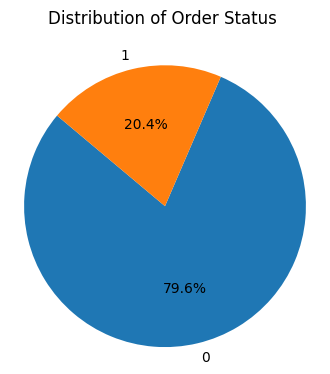

In [9]:
plt.figure(figsize=(4,4))
output_counts = df['Exited'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

Box plot for numerical features:


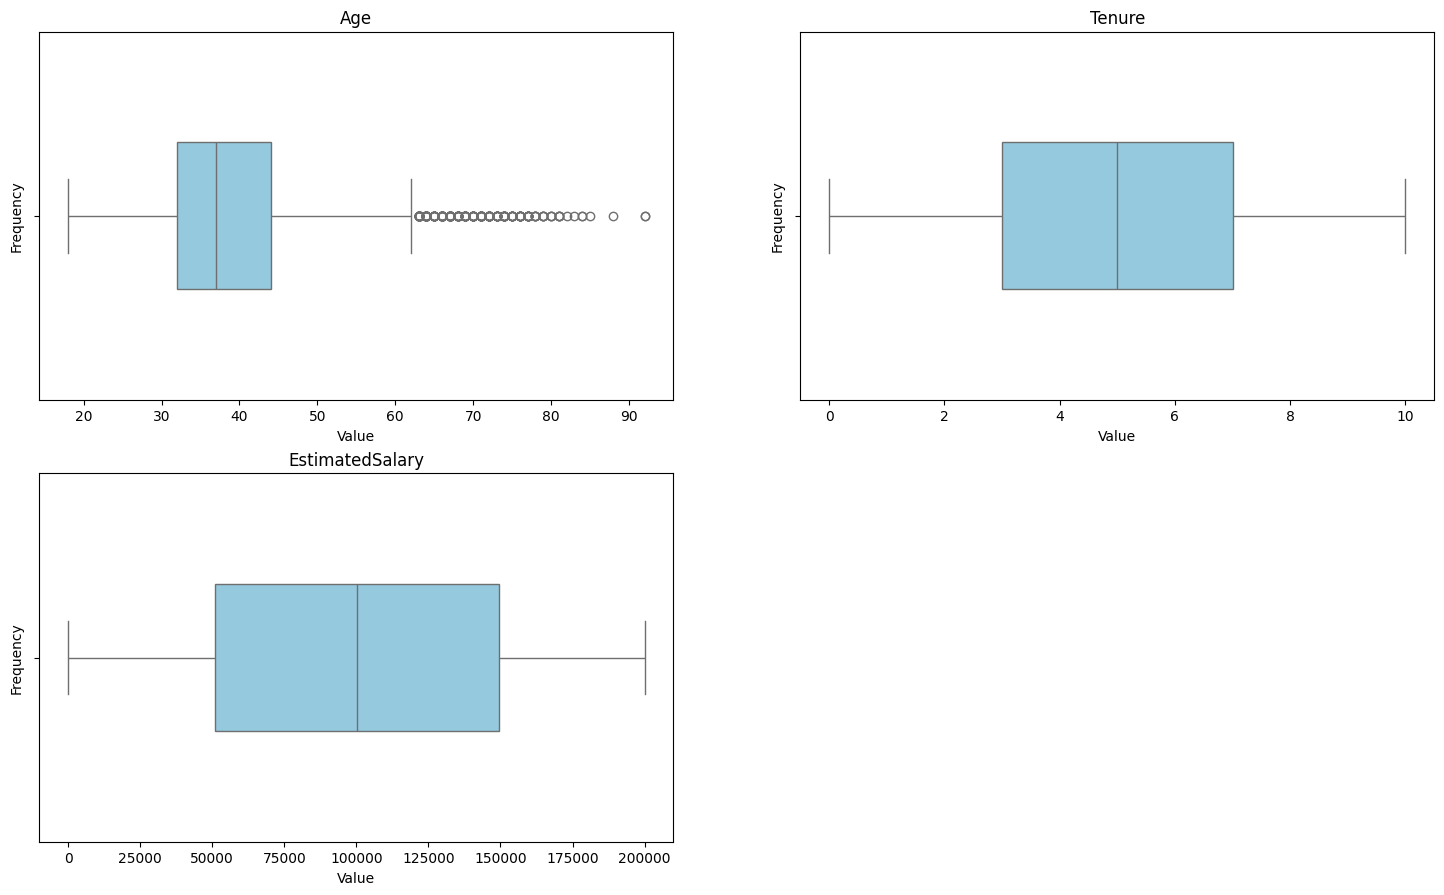

In [10]:
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['Age','Tenure','EstimatedSalary']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=df[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Count plot for categorical features:


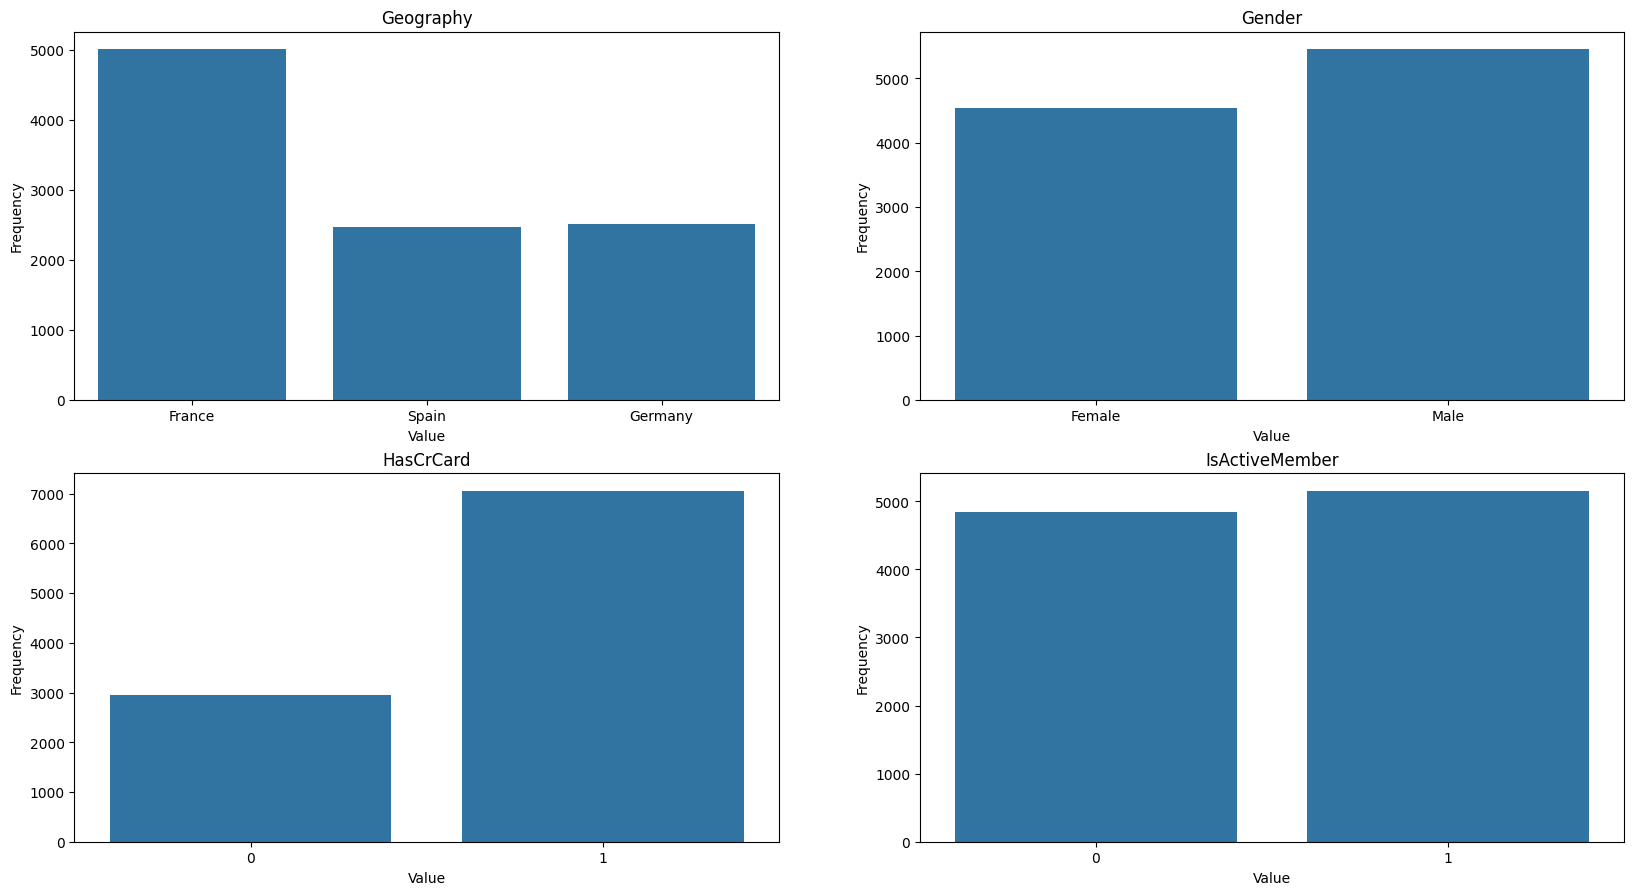

In [11]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(['Geography','Gender','HasCrCard','IsActiveMember']):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= df[column], data=df)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

Observing independent variables based on the Exited Column:


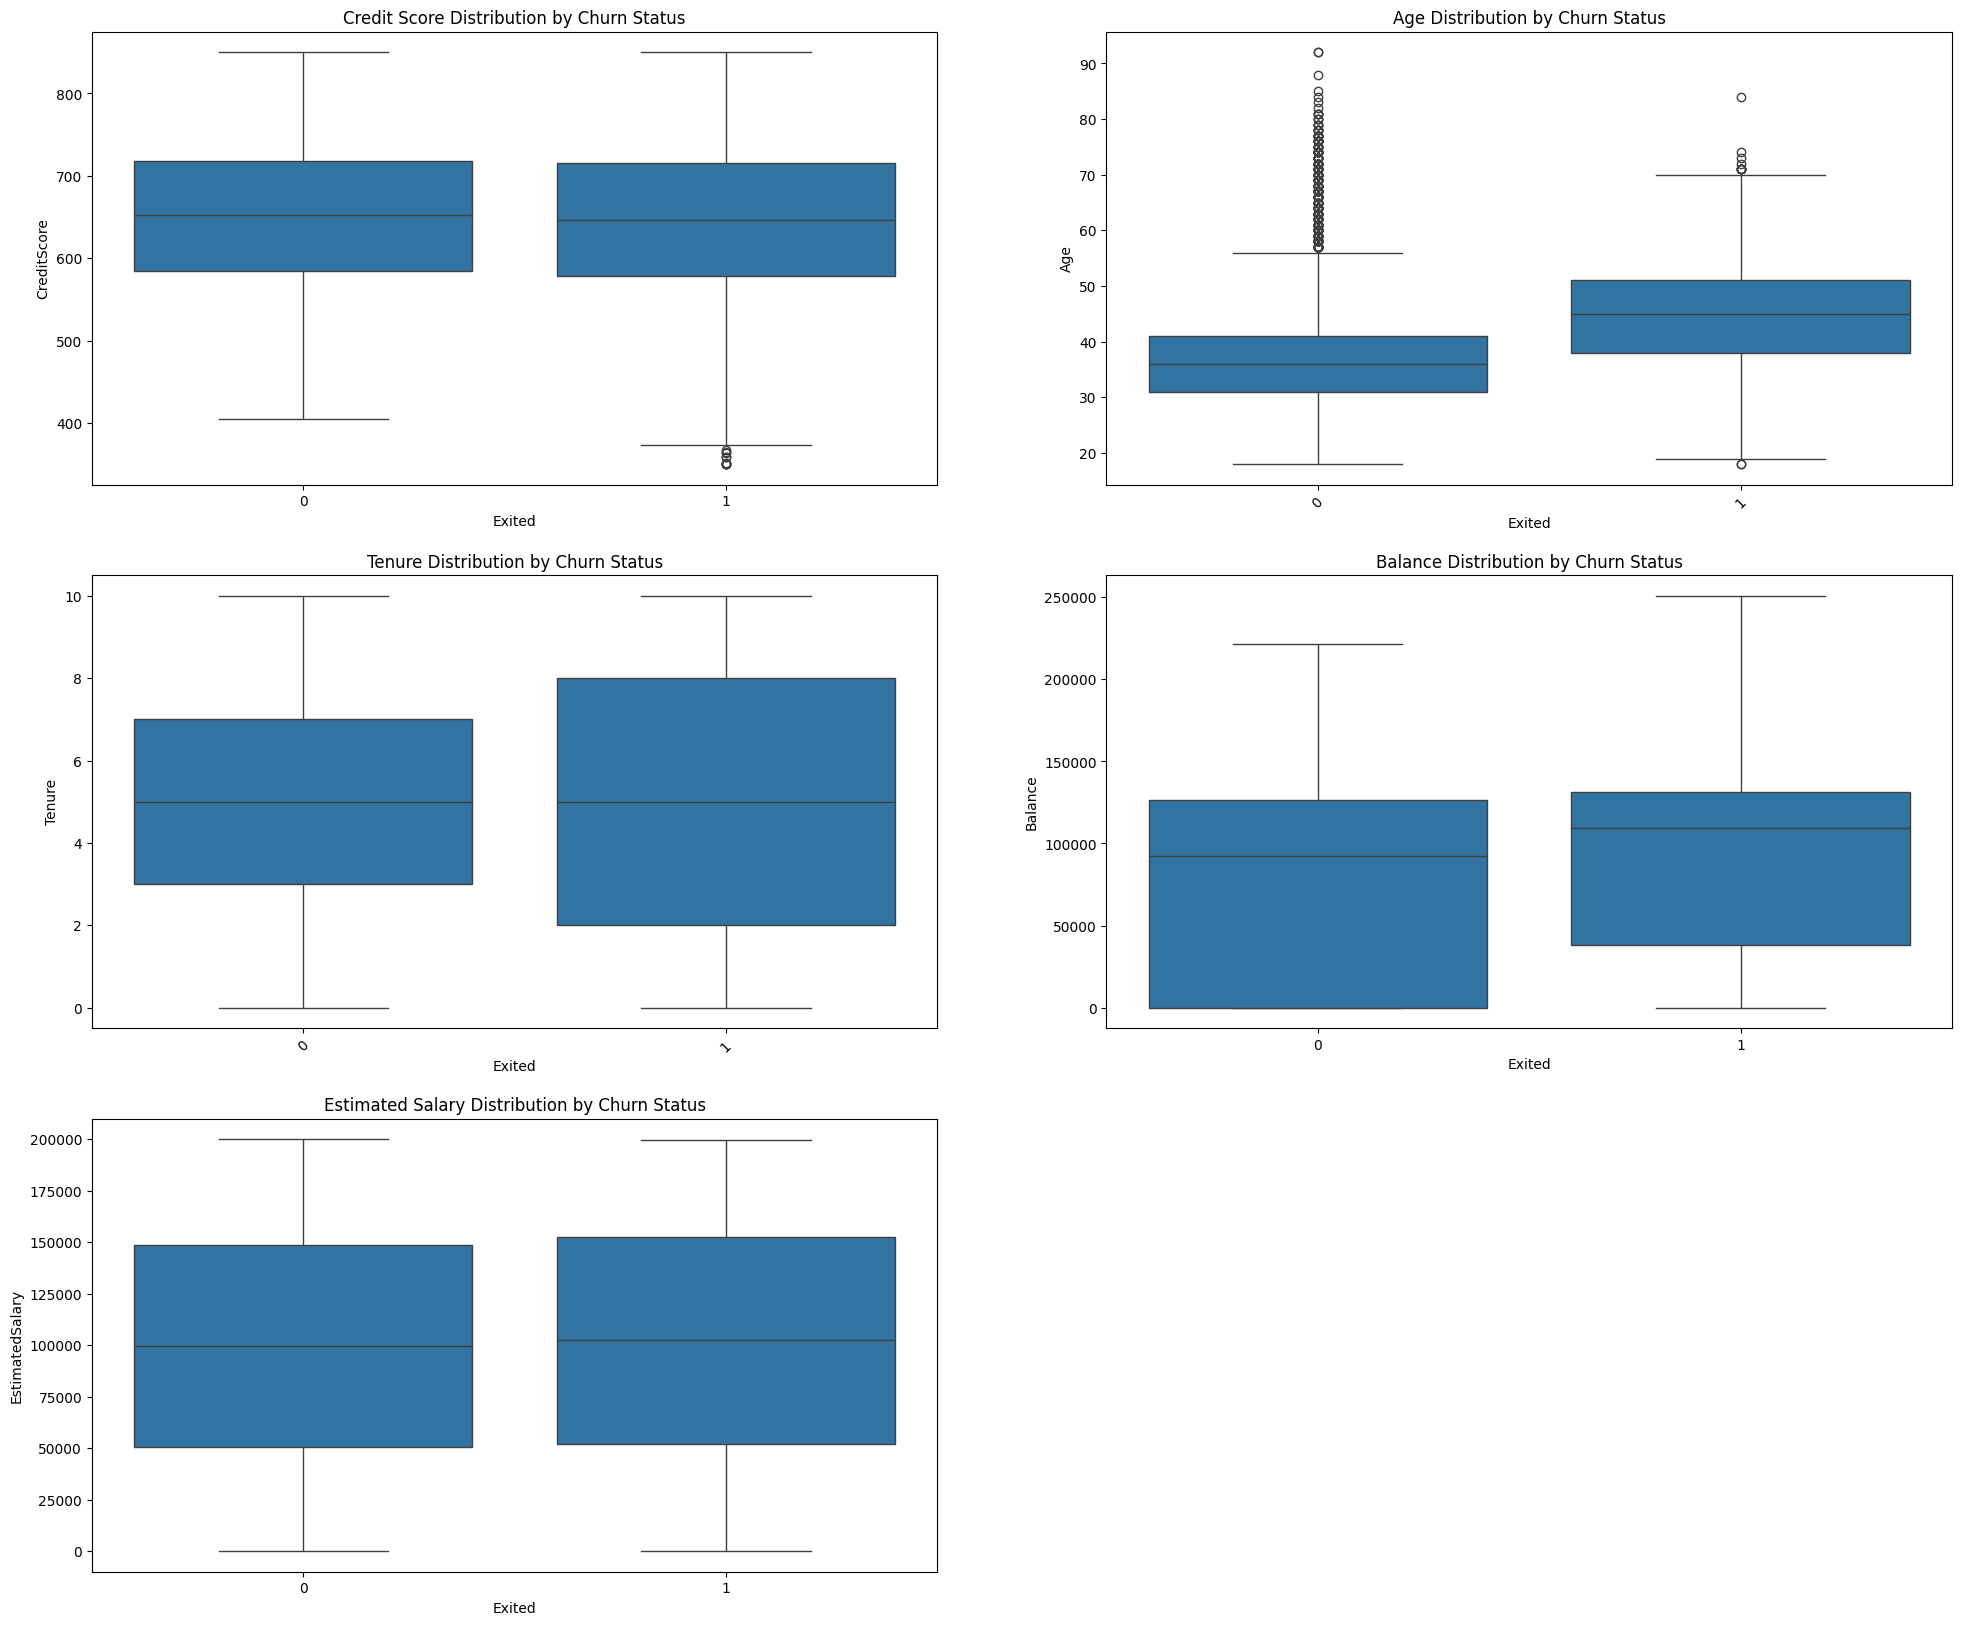

In [12]:
print("Observing independent variables based on the Exited Column:")

fig, axes = plt.subplots(3,2, figsize=(24,20))

sns.boxplot(data=df, y='CreditScore', x ='Exited',  ax=axes[0,0])
axes[0,0].set_title('Credit Score Distribution by Churn Status')

sns.boxplot(data=df, y='Age', x ='Exited', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Churn Status')
axes[0,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Tenure', x ='Exited', ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn Status')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Balance', x ='Exited', ax=axes[1,1])
axes[1,1].set_title('Balance Distribution by Churn Status')

sns.boxplot(data=df, y='EstimatedSalary', x= 'Exited', ax=axes[2,0])
axes[2,0].set_title('Estimated Salary Distribution by Churn Status')

axes[2,1].axis('off')
plt.show()

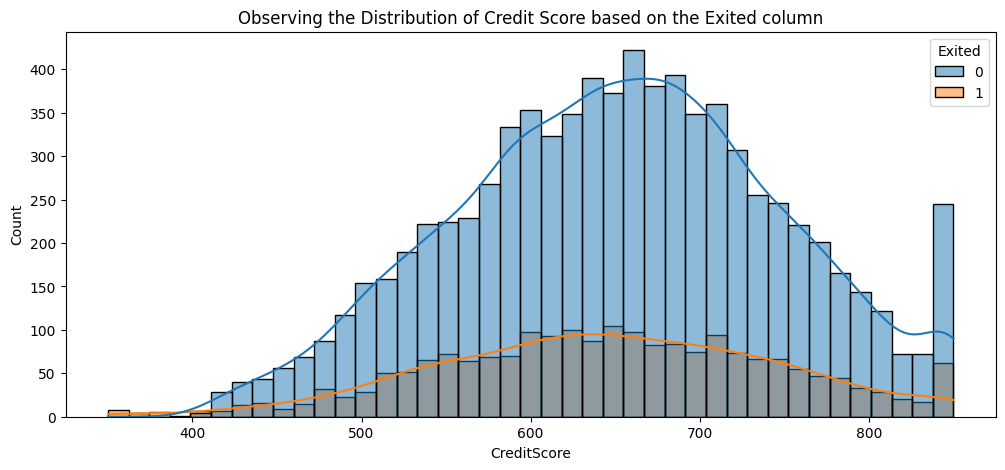

In [13]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True)
plt.title('Observing the Distribution of Credit Score based on the Exited column')
plt.show()

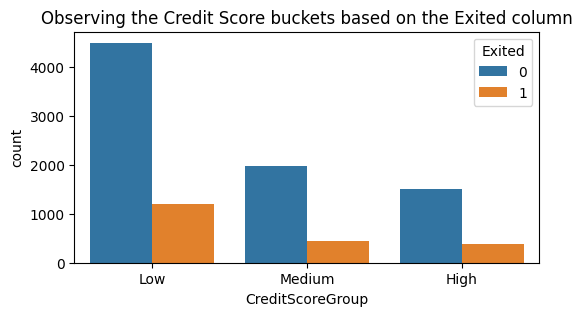

In [14]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'CreditScoreGroup', hue = 'Exited', data = df)
plt.title('Observing the Credit Score buckets based on the Exited column')
plt.show()

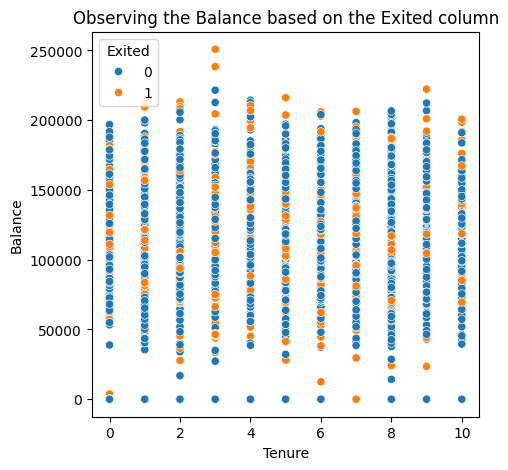

In [15]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Tenure', y='Balance', hue='Exited', data=df)
plt.title('Observing the Balance based on the Exited column')
plt.show()

In [16]:
df['CreditUtilization']=df['Balance']/df['CreditScore']

df['InteractionScore']=df['NumOfProducts']+df['HasCrCard']+df['IsActiveMember']

df['BalanceToSalaryRatio']=df['Balance']/df['EstimatedSalary']

df['CreditScoreAgeInteraction']=df['CreditScore']*df['Age']

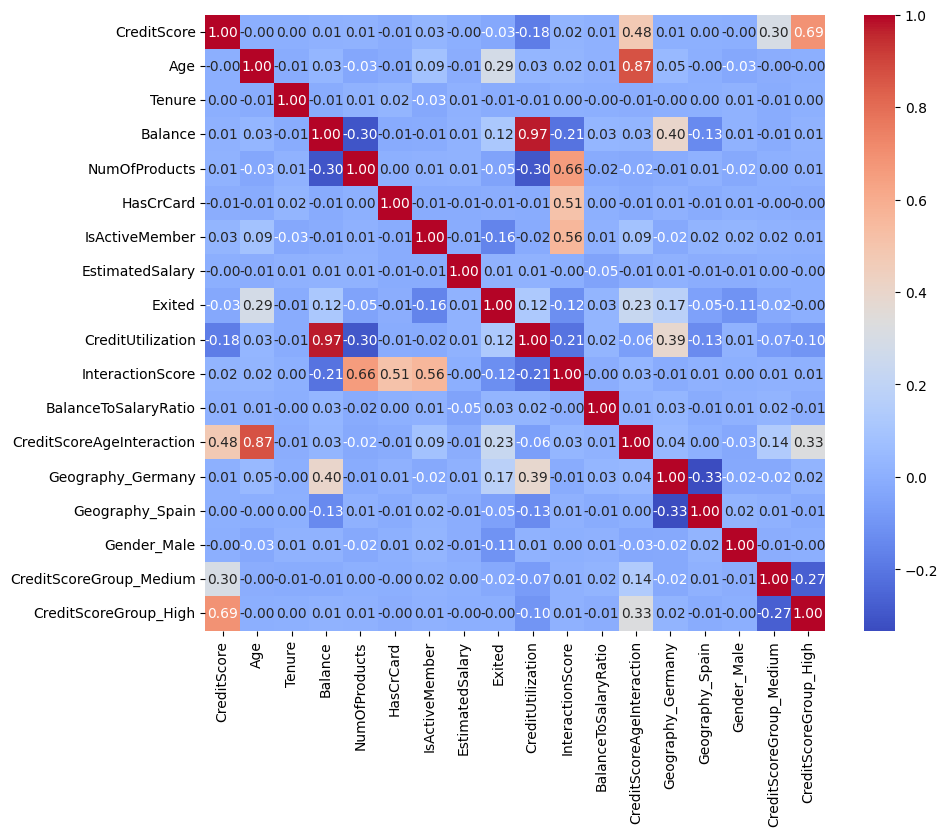

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Remove ID columns
df_new = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

# Convert categorical columns to numeric (one-hot encoding)
df_encoded = pd.get_dummies(df_new, drop_first=True)

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [18]:
import pandas as pd

df_new = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df_encoded = pd.get_dummies(df_new, drop_first=True)

correlation_matrix = df_encoded.corr()
target_correlations = correlation_matrix['Exited']
print(target_correlations.sort_values(ascending=False))


Exited                       1.000000
Age                          0.285323
CreditScoreAgeInteraction    0.232030
Geography_Germany            0.173488
CreditUtilization            0.121692
Balance                      0.118533
BalanceToSalaryRatio         0.025558
EstimatedSalary              0.012097
CreditScoreGroup_High       -0.001749
HasCrCard                   -0.007138
Tenure                      -0.014001
CreditScoreGroup_Medium     -0.024659
CreditScore                 -0.027094
NumOfProducts               -0.047820
Geography_Spain             -0.052667
Gender_Male                 -0.106512
InteractionScore            -0.122148
IsActiveMember              -0.156128
Name: Exited, dtype: float64


In [19]:
cat_col = ['Geography','Gender','CreditScoreGroup']

print("Observing the categorical column disribution before encoding: \n")
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

Geography 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

CreditScoreGroup 

CreditScoreGroup
Low       5693
Medium    2428
High      1879
Name: count, dtype: int64 



In [20]:
encoder = LabelEncoder()

for columns in cat_col:
    df[columns] = encoder.fit_transform(df[columns])

print("Observing the categorical column disribution after encoding: \n")    
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution after encoding: 

Geography 

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64 

Gender 

Gender
1    5457
0    4543
Name: count, dtype: int64 

CreditScoreGroup 

CreditScoreGroup
1    5693
2    2428
0    1879
Name: count, dtype: int64 



In [21]:
col_drop = ['Exited','RowNumber','CustomerId','Surname']
X = df.drop(col_drop, axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaling_columns = ['Age','CreditScore','Balance','EstimatedSalary','CreditUtilization','BalanceToSalaryRatio','CreditScoreAgeInteraction']

scaler = StandardScaler()
scaler.fit(X_train[scaling_columns])

X_train[scaling_columns] = scaler.transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [22]:
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:",X_test.shape, y_test.shape)

Training dataset shape: (7000, 15) (7000,)
Test dataset shape: (3000, 15) (3000,)


In [23]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pandas as pd

models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': make_pipeline_imb(SMOTE(random_state=42), KNeighborsClassifier()),
    'Support Vector Machine': make_pipeline_imb(SMOTE(random_state=42), SVC(probability=True, random_state=42)),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                             scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
                             random_state=42),
    'Gradient Boosting': make_pipeline_imb(SMOTE(random_state=42), GradientBoostingClassifier(random_state=42))
}

results_df = pd.DataFrame(columns=['Model','Accuracy','Recall Score','F1 Score','ROC AUC Score'])

for name, model in models.items():
    print(f"Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred), '\n')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), '\n')
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    
    results_df.loc[len(results_df)] = [name, accuracy, recall, f1, roc_auc]
    print("-" * 50, '\n')

print(results_df)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.70      0.73      3000
 

Confusion Matrix:
 [[1712  704]
 [ 185  399]] 

-------------------------------------------------- 

Model: Random Forest
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.79      0.42      0.55       584

    accuracy                           0.87      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000
 

Confusion Matrix:
 [[2351   65]
 [ 337  247]] 

-------------------------------------------------- 

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

          

In [24]:
results_df

,Model,Accuracy,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.703667,0.683219,0.473029,0.764082
1,Random Forest,0.866000,0.422945,0.551339,0.854506
2,K-Nearest Neighbors,0.752333,0.667808,0.512147,0.776639
3,Support Vector Machine,0.785667,0.662671,0.546224,0.822500
4,XGBoost,0.833000,0.609589,0.586974,0.841784
5,Gradient Boosting,0.817000,0.700342,0.598391,0.859767


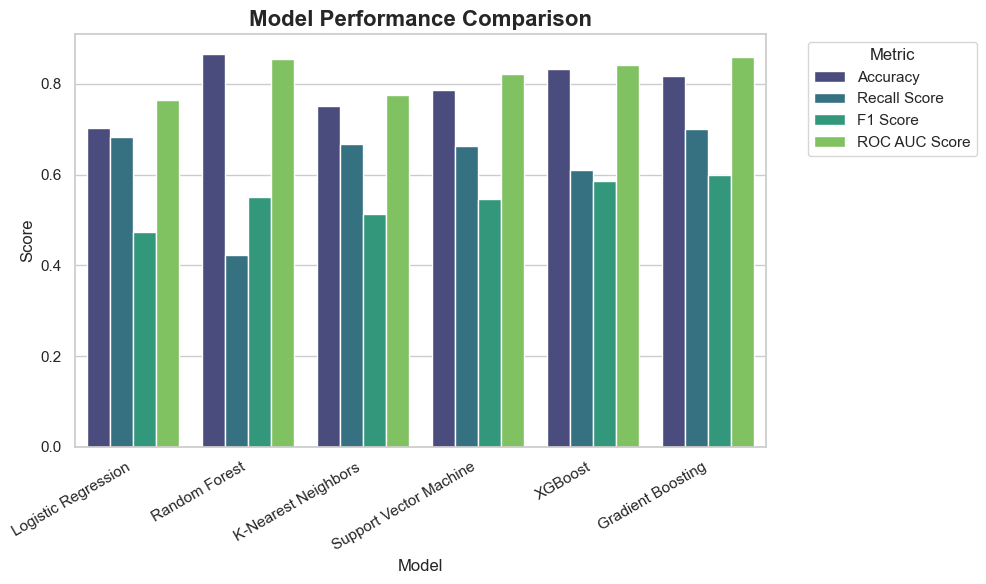

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.figure(figsize=(10,6))
sns.set(style="whitegrid")

# Melt the DataFrame to long format for easier plotting
metrics_df = results_df.melt(id_vars="Model",
                             value_vars=["Accuracy", "Recall Score", "F1 Score", "ROC AUC Score"],
                             var_name="Metric",
                             value_name="Score")


sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_df, palette="viridis")

plt.title("Model Performance Comparison", fontsize=16, weight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [26]:
import joblib

# Get Gradient Boosting model from your models dictionary
best_model = models['Gradient Boosting']

joblib.dump(best_model, 'gradient_boosting_model.pkl')

print("Gradient Boosting model saved successfully as 'gradient_boosting_model.pkl'")


Gradient Boosting model saved successfully as 'gradient_boosting_model.pkl'


Interpretation
Best Overall Model → Gradient Boosting Classifier

Gradient Boosting achieves the best balance among all metrics:

Accuracy: 81.7% — consistent performance across classes

Recall: 70.0% — highest recall (best at detecting churned customers)

F1-Score: 0.60 — best harmonic mean of precision and recall

ROC-AUC: 0.86 — strong overall model discrimination capability

Why Gradient Boosting Fits Best

Handles class imbalance well
Gradient Boosting can adaptively focus on misclassified examples (like churned customers who are fewer).
That’s why its recall is highest — it identifies more true churn cases.

Captures complex patterns
Unlike Logistic Regression (linear), it builds an ensemble of weak learners (trees) to learn non-linear relationships between customer behavior and churn.

Avoids overfitting better than Random Forest
Random Forest got high accuracy (86%) but very low recall (42%), meaning it predicts most customers as non-churners — not ideal for business decisions.
Gradient Boosting, on the other hand, maintains both precision and recall balance.

Consistent ROC-AUC score (0.86)
Indicates reliable classification ranking across thresholds.